#Hospital Readmission Prediction

#PROBLEM STATEMENT:-
#=>Building a machine learning model to predict and prevent hospital readmissions by analyzing patient data to identify individuals at high risk and providing targeted interventions.



# Importing Libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import sys

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/Colab Notebooks/HospitalReadmission

/content/gdrive/My Drive/Colab Notebooks/HospitalReadmission


#Load dataset
#UCI Machine Learning Repository
#Selection of Dataset

In [4]:
dataset = pd.read_csv("diabetic_data.csv")

In [5]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
#How many rows and column in the dataset.
dataset.shape

(101766, 50)

In [7]:
#datatypes of attributes
dataset.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
dataset.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
dataset['weight'].value_counts()
#Here "?" value is 98569


?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

<AxesSubplot:xlabel='weight', ylabel='count'>

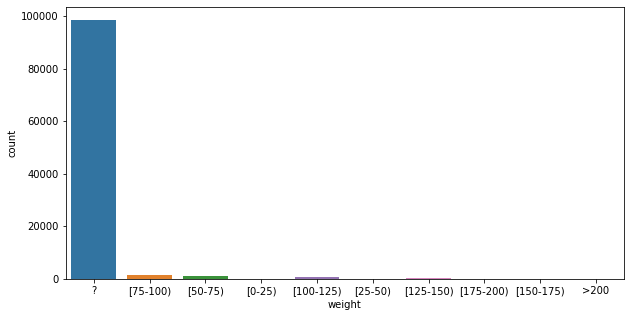

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['weight'])

In [12]:
dataset['age'].value_counts()
#the variables between that specific  value

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

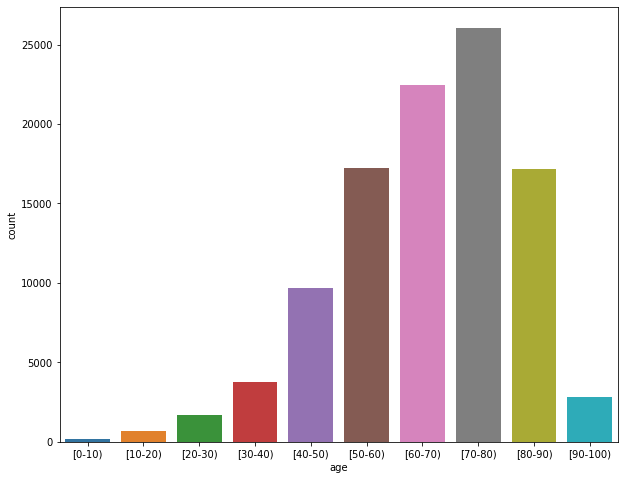

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(dataset['age'])

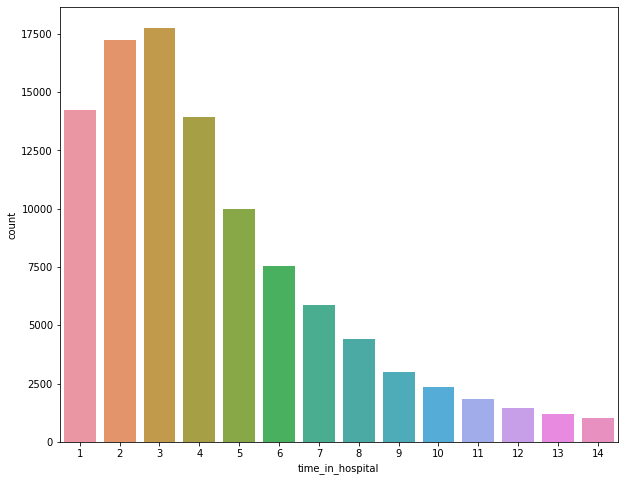

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(dataset['time_in_hospital'])
plt.show()

#PRE-PROCESSING DATA ANALYSIS 
•Treatment of Missing and Null values

•Dropping unnecessary columns

•Feature Engineering

•Feature Selection

•Feature Scaling prior to building model

Before we do analysis we need to make sure that there are no duplicate rows. By looking at the data we can confirm that encounter_id is unique and we are checking if there are any duplicate encounter_ids and we find that there aren't any.

In [16]:
#checking if there are any duplicates in encounter_id - no duplicates found
ids = dataset['encounter_id']
dataset[ids.duplicated()]
#no duplicates found

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [17]:
#One observation is unknown in gender. Replace it as a null value
print('gender', dataset['gender'][dataset['gender'] == 'Unknown/Invalid'].count())
dataset= dataset.replace('Unknown/Invalid', np.NaN )  

gender 3


In [18]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [19]:
print(dataset.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      3
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [20]:
dataset = dataset.replace('?', np.NaN )

In [21]:
dataset.head()   # "?" is replace by "NaN"

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [22]:
#finding the number of null values in each column 
print(dataset.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [23]:
dataset.shape

(101766, 50)

In [24]:
dataset['admission_type_id']=dataset['admission_type_id'].astype('object')
dataset['discharge_disposition_id']=dataset['discharge_disposition_id'].astype('object')
dataset['admission_source_id']=dataset['admission_source_id'].astype('object')
#changeing the datatype
#from 'object' to 'int64'

In [25]:
dataset.age = dataset.age.replace({"[70-80)" : 75,
                               "[60-70)": 65,
                               "[80-90)": 85,
                               "[40-50)": 45,
                               "[50-60)" :55,
                               "[30-40)": 35,
                               "[90-100)": 95,
                               "[20-30)": 25,
                               "[10-20)": 15,
                               "[0-10)": 5})


In [26]:
dataset['age']=dataset['age'].astype('int64')

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101763 non-null  object
 4   age                       101766 non-null  int64 
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  object
 7   discharge_disposition_id  101766 non-null  object
 8   admission_source_id       101766 non-null  object
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [28]:
# Numerical Features
column_numrical = ['encounter_id','patient_nbr','age','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency','number_inpatient','number_diagnoses']
column_numrical

['encounter_id',
 'patient_nbr',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [29]:
dataset[column_numrical].isnull().sum()

encounter_id          0
patient_nbr           0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [30]:
#Categorical Features
column_categorical = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code','readmitted']
column_categorical

['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'payer_code',
 'readmitted']

In [31]:
dataset[column_categorical].isnull().sum()
#check null value of categorical data

race                         2273
gender                          3
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  40256
readmitted                      0
dtype: int64

In [32]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#race, payer_code, and medical_specialty have missing data. Since these are categorical data, the best thing to do is to just add another categorical type for unknown using the fillna function.

In [33]:
dataset['race'] = dataset['race'].fillna('Unknown')
dataset['payer_code'] = dataset['payer_code'].fillna('Unknown')
dataset['medical_specialty'] = dataset['medical_specialty'].fillna('Unknown')
#fillna will fill null space with 'unknown' here

In [34]:
print('Number medical specialty:', dataset.medical_specialty.nunique())
dataset.groupby('medical_specialty').size().sort_values(ascending = False)
#overview of value from decending order

Number medical specialty: 73


medical_specialty
Unknown                             49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

In [35]:
dataset['medical_specialty'].value_counts()

Unknown                          49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

#We can see that most of them are unknown and that the count drops off pretty quickly. We don't want to add 73 new variables since some of them only have a few samples. As an alternative, we can create a new variable that only has 11 options (the top 10 specialities and then an other category). Obviously, there are other options for bucketing, but this is one of the easiest methods

In [36]:
dataset["medical_specialty"].value_counts().nlargest(10)
#through this it will find the top 10 repeating values of "medical_specialty" of dataset

Unknown                       49949
InternalMedicine              14635
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5352
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
Name: medical_specialty, dtype: int64

In [37]:
top_10 = ['Unknown','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
dataset['med_spec'] = dataset['medical_specialty'].copy()
#then we will make a replica of the "medical_specialty" 

# replace all specialties not in top 10 with 'Other'
dataset.loc[~dataset.med_spec.isin(top_10),'med_spec'] = 'Other'
#then select only Top10 variable and other then that we will set == 'other' 

#after checking the whole "medical_specialty" column then we will get that Top 10 variables which are comes countinously more and more

In [38]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,Caucasian,Female,5,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,Other
1,149190,55629189,Caucasian,Female,15,NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Unknown
2,64410,86047875,AfricanAmerican,Female,25,NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,Unknown
3,500364,82442376,Caucasian,Male,35,NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,Unknown
4,16680,42519267,Caucasian,Male,45,NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,Unknown


In [39]:
dataset.groupby('med_spec').size()
#arranged in alphabetically

med_spec
Cardiology                     5352
Emergency/Trauma               7565
Family/GeneralPractice         7440
InternalMedicine              14635
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Other                          8340
Radiologist                    1140
Surgery-General                3099
Unknown                       49949
dtype: int64

#Correlation Heatmap
Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship

<AxesSubplot:>

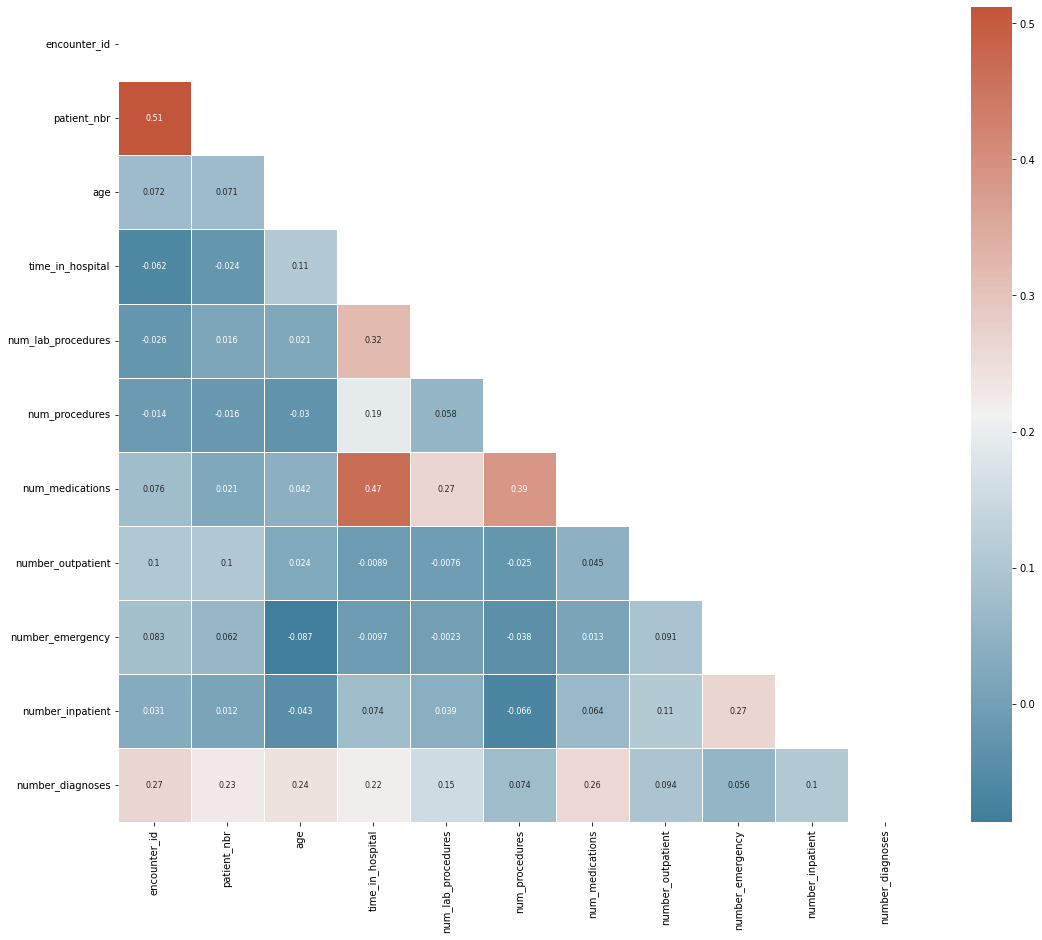

In [41]:
#Correlation between different variables

corr = dataset.corr()

#Set up the matplotlib plot configuration

fig, axis = plt.subplots(figsize=(18, 15))

#Generate a mask for upper traingle

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap

sns.heatmap(corr, annot = True, mask = mask, cmap=cmap, annot_kws={'size': 8} , linewidth=.5)




In [42]:
dataset['weight'].value_counts()


[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [43]:
dataset['weight'].isnull().sum()


98569

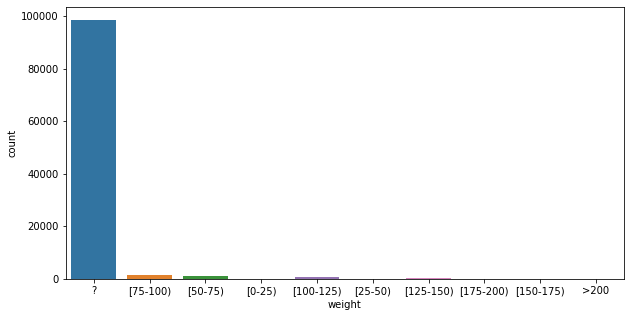

In [44]:
dataset['weight']=dataset['weight'].fillna('?')

plt.figure(figsize=(10,5))
sns.countplot(dataset['weight'])
plt.show()
#weight has heighest '?' values

We observed that “weight” is missing in 98% of the records. So, we will to drop this feature from the dataset.

In [45]:
dataset=dataset.drop('weight',axis=1) # weight Columns has been dropped.


In [46]:
dataset

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,NO,Other
1,149190,55629189,Caucasian,Female,15,1,1,7,3,Unknown,...,Up,No,No,No,No,No,Ch,Yes,>30,Unknown
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,Unknown,...,No,No,No,No,No,No,No,Yes,NO,Unknown
3,500364,82442376,Caucasian,Male,35,1,1,7,2,Unknown,...,Up,No,No,No,No,No,Ch,Yes,NO,Unknown
4,16680,42519267,Caucasian,Male,45,1,1,7,1,Unknown,...,Steady,No,No,No,No,No,Ch,Yes,NO,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,MC,...,Down,No,No,No,No,No,Ch,Yes,>30,Unknown
101762,443847782,74694222,AfricanAmerican,Female,85,1,4,5,5,MC,...,Steady,No,No,No,No,No,No,Yes,NO,Unknown
101763,443854148,41088789,Caucasian,Male,75,1,1,7,1,MC,...,Down,No,No,No,No,No,Ch,Yes,NO,Unknown
101764,443857166,31693671,Caucasian,Female,85,2,3,7,10,MC,...,Up,No,No,No,No,No,Ch,Yes,NO,Surgery-General


#Univariate analysis
Univariate analysis is basically the simplest form to analyze data. Uni means one and this means that the data has only one kind of variable.
Univariate analysis explores each variable in a data set, separately.

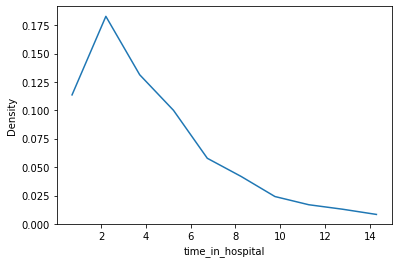

In [47]:
sns.kdeplot(dataset['time_in_hospital'],gridsize=10,cut=1)   #Majority of the patient spends 2–5 days in hospital
plt.show()

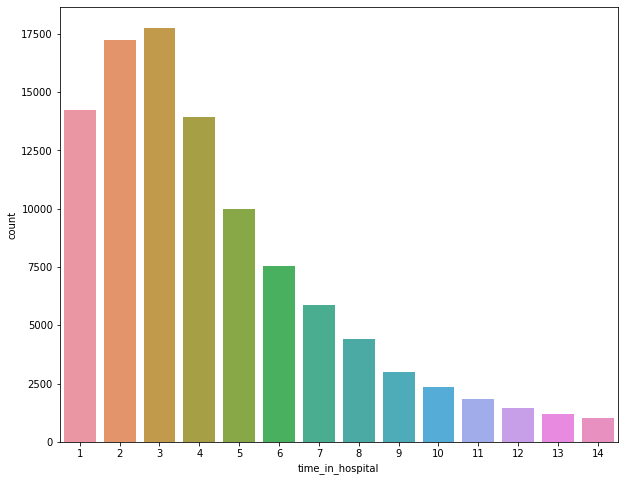

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(dataset['time_in_hospital'])
plt.show()

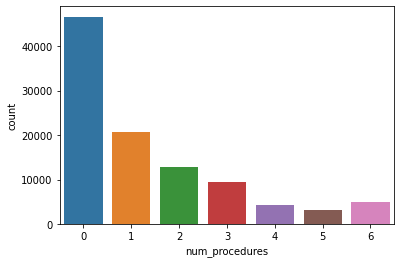

In [49]:
sns.countplot(dataset['num_procedures'])   # Majority of the patients being operated with no procedure or 1 at max.
plt.show()

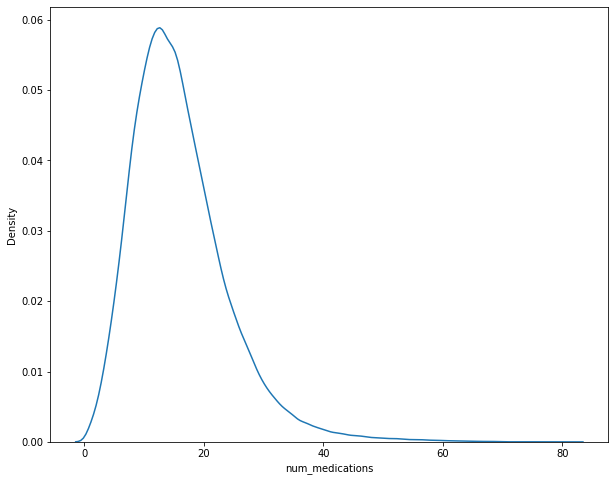

In [50]:
plt.figure(figsize=(10,8))          # Majority of patients are having 10–25 medications being given.
sns.kdeplot(dataset['num_medications'])   
plt.show()

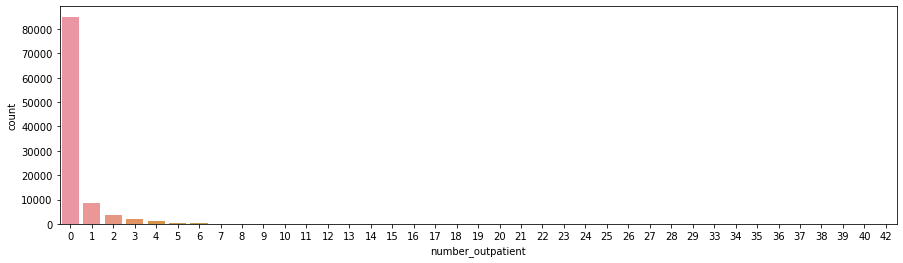

In [51]:
plt.figure(figsize=(15,4))                  #Majority of patients are NOT consuming outpatient facilities
sns.countplot(dataset['number_outpatient'])   
plt.show()

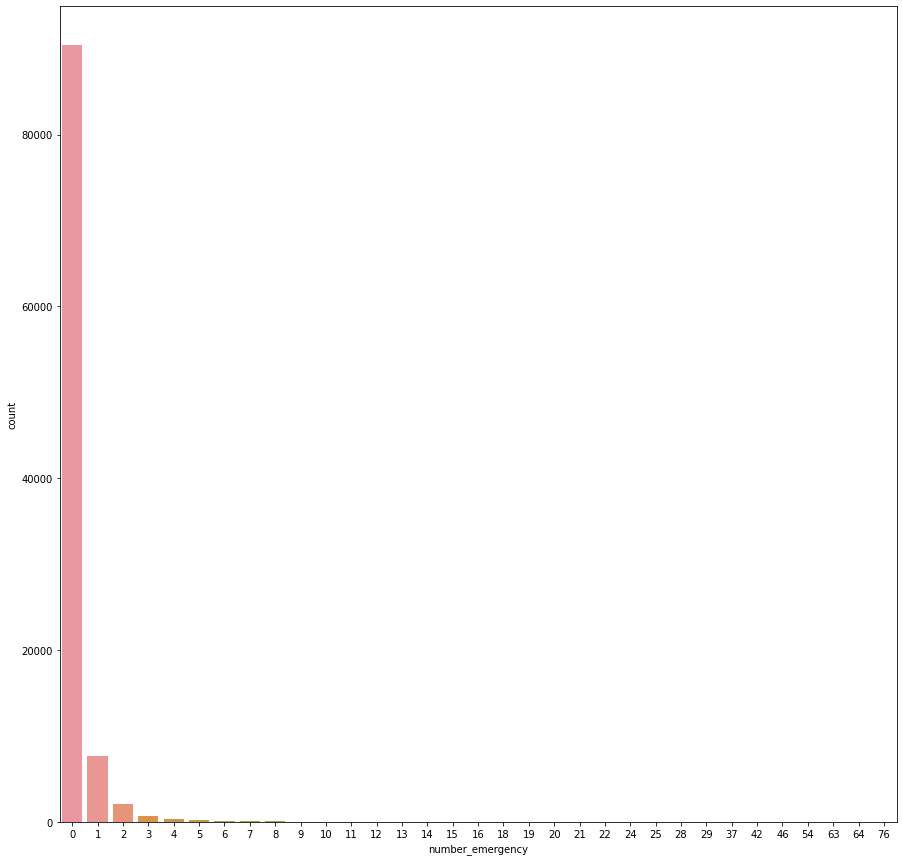

In [52]:
plt.figure(figsize=(15,15)) 
sns.countplot(dataset['number_emergency'])   #Some portions of patients are consuming emergency facilities
plt.show()

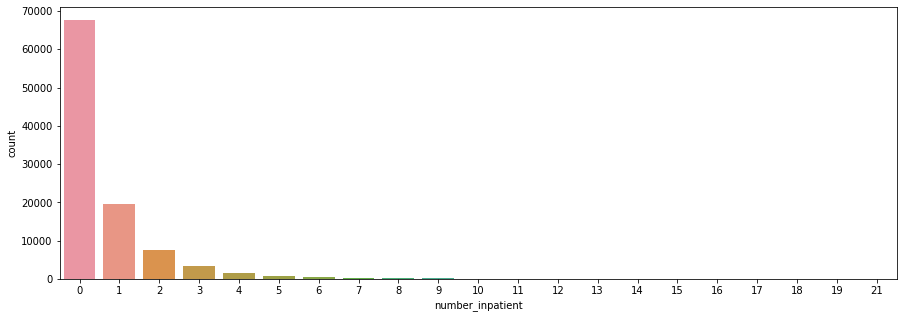

In [53]:
plt.figure(figsize=(15,5)) 
sns.countplot(dataset['number_inpatient']) #Some portions of patients are consuming outpatient facilities  
plt.show()

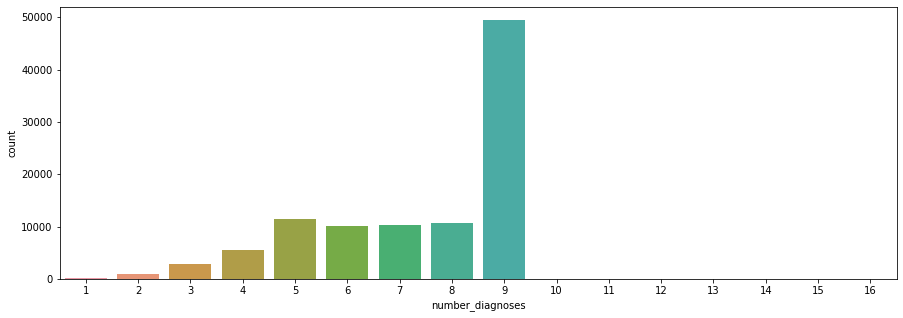

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(dataset['number_diagnoses'])  # Average of 5-9 diagnoses was entered for the majority of the patients.
plt.show()

In [55]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,NO,Other
1,149190,55629189,Caucasian,Female,15,1,1,7,3,Unknown,...,Up,No,No,No,No,No,Ch,Yes,>30,Unknown
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,Unknown,...,No,No,No,No,No,No,No,Yes,NO,Unknown
3,500364,82442376,Caucasian,Male,35,1,1,7,2,Unknown,...,Up,No,No,No,No,No,Ch,Yes,NO,Unknown
4,16680,42519267,Caucasian,Male,45,1,1,7,1,Unknown,...,Steady,No,No,No,No,No,Ch,Yes,NO,Unknown


#Bi-Variate Analysis (Numerical And Numerical)
Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes.

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101763 non-null  object
 4   age                       101766 non-null  int64 
 5   admission_type_id         101766 non-null  object
 6   discharge_disposition_id  101766 non-null  object
 7   admission_source_id       101766 non-null  object
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

<AxesSubplot:xlabel='age', ylabel='time_in_hospital'>

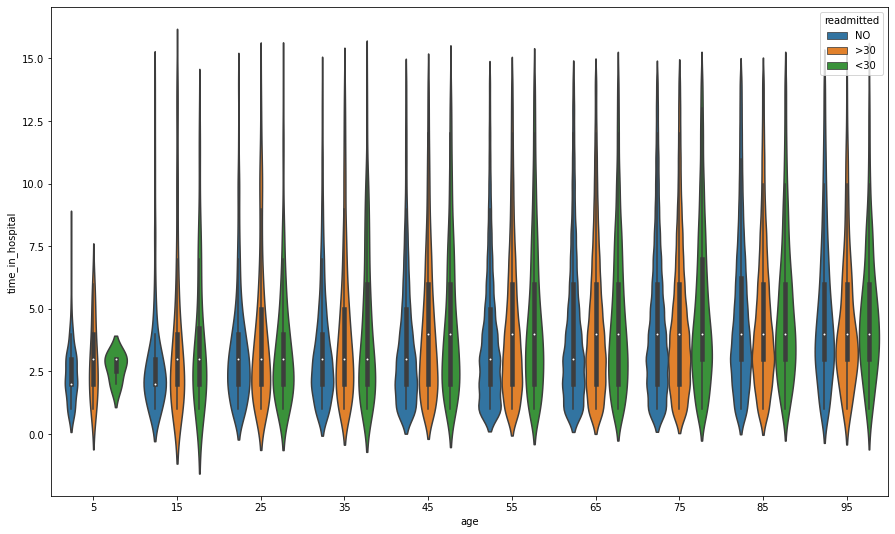

In [57]:
plt.figure(figsize=(15,9))
sns.violinplot(dataset['age'],dataset['time_in_hospital'],hue=dataset['readmitted'])

#For people in the age group 50–70 (represented by ‘55’ and ‘65’) we can clearly see a pattern where patients that stay longer are more likely to be readmitted. This is evident from the median stay value represented by white dot insidde the boxplot in violin plot. Similarly, people above 55 years of age that stay longer are more likely to be readmitted.

<AxesSubplot:xlabel='gender', ylabel='time_in_hospital'>

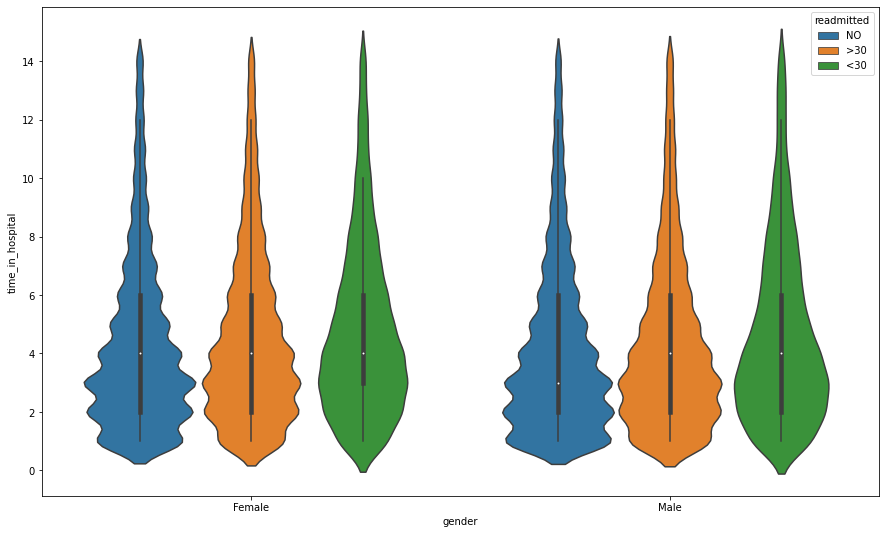

In [58]:
plt.figure(figsize=(15,9))
sns.violinplot(dataset['gender'],dataset['time_in_hospital'],hue=dataset['readmitted'])

In [59]:
column_categorical

['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'payer_code',
 'readmitted']

In [60]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,NO,Other
1,149190,55629189,Caucasian,Female,15,1,1,7,3,Unknown,...,Up,No,No,No,No,No,Ch,Yes,>30,Unknown
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,Unknown,...,No,No,No,No,No,No,No,Yes,NO,Unknown
3,500364,82442376,Caucasian,Male,35,1,1,7,2,Unknown,...,Up,No,No,No,No,No,Ch,Yes,NO,Unknown
4,16680,42519267,Caucasian,Male,45,1,1,7,1,Unknown,...,Steady,No,No,No,No,No,Ch,Yes,NO,Unknown


In [61]:
column_numrical

['encounter_id',
 'patient_nbr',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [62]:
dataset=dataset.drop(columns=['diag_1','diag_2','diag_3'],axis=1)


In [63]:
dataset['admission_type_id']=dataset['admission_type_id'].astype('int64')
dataset['discharge_disposition_id']=dataset['discharge_disposition_id'].astype('int64')
dataset['admission_source_id']=dataset['admission_source_id'].astype('int64')

#Label Encoding
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [64]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

dataset['race']=LE.fit_transform(dataset['race'])
dataset['gender']=LE.fit_transform(dataset['gender'])
dataset['payer_code']=LE.fit_transform(dataset['payer_code'])
dataset['medical_specialty']=LE.fit_transform(dataset['medical_specialty'])
dataset['max_glu_serum']=LE.fit_transform(dataset['max_glu_serum'])
dataset['A1Cresult']=LE.fit_transform(dataset['A1Cresult'])
dataset['metformin']=LE.fit_transform(dataset['metformin'])
dataset['repaglinide']=LE.fit_transform(dataset['repaglinide'])
dataset['nateglinide']=LE.fit_transform(dataset['nateglinide'])
dataset['chlorpropamide']=LE.fit_transform(dataset['chlorpropamide'])
dataset['glimepiride']=LE.fit_transform(dataset['glimepiride'])
dataset['acetohexamide']=LE.fit_transform(dataset['acetohexamide'])
dataset['glipizide']=LE.fit_transform(dataset['glipizide'])
dataset['glyburide']=LE.fit_transform(dataset['glyburide'])
dataset['tolbutamide']=LE.fit_transform(dataset['tolbutamide'])
dataset['pioglitazone']=LE.fit_transform(dataset['pioglitazone'])
dataset['rosiglitazone']=LE.fit_transform(dataset['rosiglitazone'])
dataset['acarbose']=LE.fit_transform(dataset['acarbose'])
dataset['miglitol']=LE.fit_transform(dataset['miglitol'])
dataset['troglitazone']=LE.fit_transform(dataset['troglitazone'])
dataset['tolazamide']=LE.fit_transform(dataset['tolazamide'])
dataset['examide']=LE.fit_transform(dataset['examide'])
dataset['citoglipton']=LE.fit_transform(dataset['citoglipton'])
dataset['insulin']=LE.fit_transform(dataset['insulin'])
dataset['glyburide-metformin']=LE.fit_transform(dataset['glyburide-metformin'])
dataset['glipizide-metformin']=LE.fit_transform(dataset['glipizide-metformin'])
dataset['glimepiride-pioglitazone']=LE.fit_transform(dataset['glimepiride-pioglitazone'])
dataset['metformin-rosiglitazone']=LE.fit_transform(dataset['metformin-rosiglitazone'])
dataset['metformin-pioglitazone']=LE.fit_transform(dataset['metformin-pioglitazone'])
dataset['change']=LE.fit_transform(dataset['change'])
dataset['med_spec']=LE.fit_transform(dataset['med_spec'])
dataset['diabetesMed']=LE.fit_transform(dataset['diabetesMed'])
dataset['readmitted']=LE.fit_transform(dataset['readmitted'])

In [65]:
# new feature creation

In [66]:
dataset['Service Utilization'] = dataset['number_inpatient']+dataset['number_outpatient']

In [67]:
# reducing unique features

In [68]:
def fun(x):
    if (x==1) | (x==2) | (x==7) :
        return 1
    if (x==5) | (x==6) | (x==8) :
        return 2
    else:
        return x

In [69]:
dataset['admission_type_id'] = dataset['admission_type_id'].apply(fun)


In [70]:
dataset['admission_type_id'].unique()

array([2, 1, 3, 4])

In [71]:
dataset['discharge_disposition_id'].unique()
# 

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [72]:
dataset['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [73]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec,Service Utilization
0,2278392,8222157,2,0,5,2,25,1,1,16,...,1,0,0,0,0,1,0,2,7,0
1,149190,55629189,2,0,15,1,1,7,3,16,...,1,0,0,0,0,0,1,1,10,0
2,64410,86047875,0,0,25,1,1,7,2,16,...,1,0,0,0,0,1,1,2,10,3
3,500364,82442376,2,1,35,1,1,7,2,16,...,1,0,0,0,0,0,1,2,10,0
4,16680,42519267,2,1,45,1,1,7,1,16,...,1,0,0,0,0,0,1,2,10,0


In [74]:
def myFun(x):
    if (x==1) | (x==6) | (x==8) | (x==9) | (x==13):
        return 1
    if (x==2) | (x==3) | (x==4) | (x==5) | (x==14) | (x==22) | (x==23) | (x==24):
        return 2
    if (x==10) | (x==12) | (x==15) | (x==16) | (x==17) :
        return 3
    if (x==18) | (x==25) | (x==26) :
        return 4
    else:
        return x

In [75]:
dataset['discharge_disposition_id'] = dataset['discharge_disposition_id'].apply(myFun)

In [76]:
data_final = dataset[dataset['patient_nbr'].duplicated(keep='first')==False]

In [77]:
data_final.shape


(71518, 48)

In [78]:
t = dataset['patient_nbr'].value_counts()

In [79]:
t.head(10)

88785891    40
43140906    28
1660293     23
88227540    23
23199021    23
23643405    22
84428613    22
92709351    21
88789707    20
29903877    20
Name: patient_nbr, dtype: int64

In [80]:
visit = pd.DataFrame()
visit['number'] = t.index
visit['no of times'] = t.values

In [81]:
visit


,number,no of times
0,88785891,40
1,43140906,28
2,1660293,23
3,88227540,23
4,23199021,23
...,...,...
71513,11005362,1
71514,98252496,1
71515,1019673,1
71516,13396320,1


In [82]:
final = pd.merge(dataset,visit,how='inner',left_on='patient_nbr',right_on='number')


In [83]:
final.drop('number',axis=1,inplace=True)


In [84]:
final.shape


(101766, 49)

In [85]:
final.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec,Service Utilization,no of times
0,2278392,8222157,2,0,5,2,4,1,1,16,...,0,0,0,0,1,0,2,7,0,1
1,149190,55629189,2,0,15,1,1,7,3,16,...,0,0,0,0,0,1,1,10,0,1
2,64410,86047875,0,0,25,1,1,7,2,16,...,0,0,0,0,1,1,2,10,3,1
3,500364,82442376,2,1,35,1,1,7,2,16,...,0,0,0,0,0,1,2,10,0,1
4,16680,42519267,2,1,45,1,1,7,1,16,...,0,0,0,0,0,1,2,10,0,1


In [86]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec,Service Utilization
0,2278392,8222157,2,0,5,2,4,1,1,16,...,1,0,0,0,0,1,0,2,7,0
1,149190,55629189,2,0,15,1,1,7,3,16,...,1,0,0,0,0,0,1,1,10,0
2,64410,86047875,0,0,25,1,1,7,2,16,...,1,0,0,0,0,1,1,2,10,3
3,500364,82442376,2,1,35,1,1,7,2,16,...,1,0,0,0,0,0,1,2,10,0
4,16680,42519267,2,1,45,1,1,7,1,16,...,1,0,0,0,0,0,1,2,10,0


In [87]:
pip install mlxtend  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Joblib is a set of tools to provide lightweight pipelining in Python.

The vision is to provide tools to easily achieve better performance and reproducibility when working with long running jobs.

In [88]:
# import joblib

# sys.modules['sklearn.externals.joblib'] = joblib

In [89]:
# from mlxtend.feature_selection import SequentialFeatureSelector
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# sfs = SequentialFeatureSelector(estimator=rf,k_features='best',forward=True,scoring='accuracy',verbose=2,n_jobs=-1)

In [90]:
# X=final.drop('readmitted',axis=1)
# y=final['readmitted']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

#Best features using sequential feature selection

In [91]:
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [92]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
sfs = SequentialFeatureSelector(estimator=rf,k_features='best',forward=True,scoring='accuracy',verbose=2,n_jobs=1)

In [93]:
X=final.drop('readmitted',axis=1)
y=final['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [94]:
sfs.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  8.1min finished

[2023-03-01 06:49:52] Features: 1/48 -- score: 0.6712476748259542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:  7.6min finished

[2023-03-01 06:57:27] Features: 2/48 -- score: 0.7153545983281171[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:  7.9min finished

[2023-03-01 07:05:22] Features: 3/48 -- score: 0.7174041132096842[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=RandomForestClassifier(), k_features='best',
                          scoring='accuracy', verbose=2)

In [95]:
finalseq = ['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'Service Utilization',
 'no of times']


In [96]:
finalseq=final.drop(['time_in_hospital','num_procedures','med_spec'],axis=1)


In [97]:
X=finalseq.drop('readmitted',axis=1)
y=finalseq['readmitted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

#Model Evaluation using Confusion Matrix:-
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

#Logistic Regression
Logistic regression aims to solve classification problems. 

It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr1=LogisticRegression()
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
lr1.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(lr1.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(lr1.score(scaledX_train,y_train))

predicted = lr1.predict(scaledX_test)
print(predicted)
print(lr1.predict_proba(scaledX_test))

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
0.6816901408450704
What is the Training Accuracy
0.6808355325958785
[1 1 2 ... 2 1 1]
[[0.17320519 0.47700571 0.3497891 ]
 [0.22848673 0.38630836 0.38520492]
 [0.05448525 0.20652165 0.7389931 ]
 ...
 [0.07267762 0.2359713  0.69135109]
 [0.20414477 0.51239215 0.28346308]
 [0.10484713 0.51596511 0.37918776]]
[[   55  2014  1303]
 [   53  5811  4848]
 [   16  1484 14946]]
              precision    recall  f1-score   support

           0       0.44      0.02      0.03      3372
           1       0.62      0.54      0.58     10712
           2       0.71      0.91      0.80     16446

    accuracy                           0.68     30530
   macro avg       0.59      0.49      0.47     30530
weighted avg       0.65      0.68      0.64     30530



#Decision Tree
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. 

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,cohen_kappa_score

DT1 = DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=10)
DT1.fit(X_train,y_train)
y_prediction = DT1.predict(X_test)
print('Classification report:')
print(classification_report(y_test,y_prediction))

Classification report:
              precision    recall  f1-score   support

           0       0.26      0.25      0.26      3372
           1       0.56      0.57      0.56     10712
           2       0.78      0.78      0.78     16446

    accuracy                           0.65     30530
   macro avg       0.53      0.53      0.53     30530
weighted avg       0.64      0.65      0.65     30530



#Random Forest:-
Random forest (RF) is an ensemble classifier that uses multiple models of several Decision Trees to obtain a better prediction performance. 

It is a learning method in which a number of decision trees are constructed at the time of training in parallel with bootstrapping followed by aggregation, jointly referred to as bagging and outputs of the model predicted by the individual trees.

This algorithm acts as a tree predictor where every tree depends on the random vector values. It is one of the best algorithms for classification and has the ability to classify large data with good accuracy.



In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from warnings import filterwarnings
filterwarnings('ignore')

RandFC1 = RandomForestClassifier()
RandFC1.fit(X_train,y_train)

y_tprediction = RandFC1.predict(X_train)

print('Accuracy Train :',accuracy_score(y_train,y_tprediction))
print('Confusion matrix Train :',confusion_matrix(y_train,y_tprediction))

print()

y_test_prediction = RandFC1.predict(X_test)

RandomForest_Accuracy = accuracy_score(y_test,y_test_prediction)*100
print('Accuracy Test :',accuracy_score(y_test,y_test_prediction))
print('Confusion matrix Test :',confusion_matrix(y_test,y_test_prediction))

print()

print('Calssification Report :')
print(classification_report(y_test,y_test_prediction))

Accuracy Train : 0.9999859621539671
Confusion matrix Train : [[ 7985     0     0]
 [    0 24832     1]
 [    0     0 38418]]

Accuracy Test : 0.7254503766786767
Confusion matrix Test : [[  201  2439   732]
 [  198  7281  3233]
 [   52  1728 14666]]

Calssification Report :
              precision    recall  f1-score   support

           0       0.45      0.06      0.11      3372
           1       0.64      0.68      0.66     10712
           2       0.79      0.89      0.84     16446

    accuracy                           0.73     30530
   macro avg       0.62      0.54      0.53     30530
weighted avg       0.70      0.73      0.69     30530



#Ada Boost:-
Ada-boost or Adaptive Boosting is one of the ensembles boosting classifiers. It is an iterative ensemble method. 

The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration. 

The weight is assigned to each sample in the training set equal to the current error on that sample. These weights can be used to inform the training of the weak learner. 

We have built the AdaBoost Model using Scikit-learn. It uses Decision Tree Classifier as the default Classifier.


In [101]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from warnings import filterwarnings
filterwarnings('ignore')

Adaboost_model1 = AdaBoostClassifier()
Adaboost_model1.fit(X_train,y_train)

y_tprediction = Adaboost_model1.predict(X_train)

print('Accuracy Train :',accuracy_score(y_train,y_tprediction))
print('Confusion matrix Train :',confusion_matrix(y_train,y_tprediction))

print()

y_test_prediction = Adaboost_model1.predict(X_test)

AdaBoost_Accuracy = accuracy_score(y_test,y_test_prediction)*100
print('Accuracy Test :',accuracy_score(y_test,y_test_prediction))
print('Confusion matrix Test :',confusion_matrix(y_test,y_test_prediction))

print()

print('Calssification Report :')
print(classification_report(y_test,y_test_prediction))

Accuracy Train : 0.7030153293278679
Confusion matrix Train : [[  324  5769  1892]
 [  404 16871  7558]
 [  129  5404 32885]]

Accuracy Test : 0.7011791680314445
Confusion matrix Test : [[  154  2447   771]
 [  188  7274  3250]
 [   67  2400 13979]]

Calssification Report :
              precision    recall  f1-score   support

           0       0.38      0.05      0.08      3372
           1       0.60      0.68      0.64     10712
           2       0.78      0.85      0.81     16446

    accuracy                           0.70     30530
   macro avg       0.58      0.52      0.51     30530
weighted avg       0.67      0.70      0.67     30530



In [102]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(learning_rate = 0.01, gamma = 2)

xgb1.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score, classification_report

y_pred = xgb1.predict(X_test)

print('AUC score :', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

AUC score : 0.7241729446446119
              precision    recall  f1-score   support

           0       0.50      0.02      0.04      3372
           1       0.64      0.67      0.65     10712
           2       0.78      0.91      0.84     16446

    accuracy                           0.72     30530
   macro avg       0.64      0.53      0.51     30530
weighted avg       0.70      0.72      0.68     30530



In [104]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.5 MB/s eta 0:00:00


#CatBoost
CatBoost is an algorithm for gradient boosting on decision trees.

In [105]:
from catboost import CatBoostClassifier
cat1 = CatBoostClassifier()
cat1.fit(X_train,y_train)
cat1.predict(X_test)

Learning rate set to 0.098358
0:	learn: 1.0298993	total: 132ms	remaining: 2m 12s
1:	learn: 0.9751070	total: 195ms	remaining: 1m 37s
2:	learn: 0.9324952	total: 259ms	remaining: 1m 26s
3:	learn: 0.8978786	total: 316ms	remaining: 1m 18s
4:	learn: 0.8688610	total: 380ms	remaining: 1m 15s
5:	learn: 0.8432445	total: 454ms	remaining: 1m 15s
6:	learn: 0.8226698	total: 522ms	remaining: 1m 14s
7:	learn: 0.8060391	total: 577ms	remaining: 1m 11s
8:	learn: 0.7913113	total: 643ms	remaining: 1m 10s
9:	learn: 0.7778071	total: 701ms	remaining: 1m 9s
10:	learn: 0.7681210	total: 801ms	remaining: 1m 12s
11:	learn: 0.7584189	total: 866ms	remaining: 1m 11s
12:	learn: 0.7498009	total: 935ms	remaining: 1m 10s
13:	learn: 0.7433670	total: 990ms	remaining: 1m 9s
14:	learn: 0.7368579	total: 1.1s	remaining: 1m 12s
15:	learn: 0.7319879	total: 1.19s	remaining: 1m 12s
16:	learn: 0.7268819	total: 1.29s	remaining: 1m 14s
17:	learn: 0.7218306	total: 1.37s	remaining: 1m 14s
18:	learn: 0.7173911	total: 1.46s	remaining: 1m

array([[1],
       [2],
       [2],
       ...,
       [2],
       [1],
       [1]])

#LightGBM
LightGBM is a fast, distributed, high performance gradient boosting framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks. 

In [106]:
import lightgbm as lgb
lgbmc=lgb.LGBMClassifier(random_state=4)
lgbmc.fit(X_train,y_train)

y_train_pred = lgbmc.predict(X_train)
y_train_prob = lgbmc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('\n')
y_test_pred = lgbmc.predict(X_test)
y_test_prob = lgbmc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("classification report:\n",classification_report(y_test,y_test_pred))

Accuracy Train: 0.7429810769835477
Confusion Matrix Train:
 [[  668  5558  1759]
 [  228 17103  7502]
 [   74  3188 35156]]


Accuracy Test: 0.7323943661971831
Confusion Matrix Test:
 [[  188  2467   717]
 [  170  7295  3247]
 [   32  1537 14877]]
classification report:
               precision    recall  f1-score   support

           0       0.48      0.06      0.10      3372
           1       0.65      0.68      0.66     10712
           2       0.79      0.90      0.84     16446

    accuracy                           0.73     30530
   macro avg       0.64      0.55      0.54     30530
weighted avg       0.71      0.73      0.70     30530



#Naive Bayes:-
Naive Bayes classifier is a probabilistic machine learning model that’s used for a classification task.
 There are three types of Naive Bayes Classifier: 

(1). Multinomial Naive Bayes

(2). Bernoulli Naive Bayes

(3). Gaussian Naive Bayes 

We have used Gaussian Naive Bayes as the features follow a normal distribution.

In [107]:
#Training the model on the training set
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)

#making prediction on the testing set
y_pred = NB.predict(X_test)

#Comparing actual response values (y_test) with predicted response values (y_pred)

from sklearn import metrics

print("Gaussian Naive Bayes model accuracy(in %): ",metrics.accuracy_score(y_test,predicted)*100)
print(metrics.classification_report(y_test,predicted))


Gaussian Naive Bayes model accuracy(in %):  68.16901408450704
              precision    recall  f1-score   support

           0       0.44      0.02      0.03      3372
           1       0.62      0.54      0.58     10712
           2       0.71      0.91      0.80     16446

    accuracy                           0.68     30530
   macro avg       0.59      0.49      0.47     30530
weighted avg       0.65      0.68      0.64     30530



#Gradient Boosting:-
Gradient Boosting trains many models in a gradual, additive, and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (e.g., decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function. The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data.


In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, random_state = 10)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,predicted))
print(metrics.classification_report(y_test,predicted))


Accuracy:  0.6816901408450704
              precision    recall  f1-score   support

           0       0.44      0.02      0.03      3372
           1       0.62      0.54      0.58     10712
           2       0.71      0.91      0.80     16446

    accuracy                           0.68     30530
   macro avg       0.59      0.49      0.47     30530
weighted avg       0.65      0.68      0.64     30530



#                                         END PROJECT